In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}


<IPython.core.display.Javascript object>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from IPython.display import Image
from matplotlib import pyplot as plt
from apng import APNG

%matplotlib inline

In [5]:
pd.options.display.max_columns = 100

In [6]:
df = pd.read_csv('encuesta_corr.csv', error_bad_lines=False)
zat = pd.read_csv('zat.csv', sep=";")

In [7]:
df[:1]
#len(df)

,Unnamed: 0,ID_ENCUESTA,NUMERO_PERSONA,NUMERO_VIAJE,MOTIVOVIAJE,MUNICIPIO_DESTINO,DEPARTAMENTO_DESTINO,TIEMPO_CAMINO,HORA_INICIO,HORA_FIN,MEDIO_PREDOMINANTE,ZAT_DESTINO,ZAT_ORIGEN,MUNICIPIO_ORIGEN,DEPARTAMENTO_ORIGEN,LATITUD_ORIGEN,LATITUD_DESTINO,LONGITUD_ORIGEN,LONGITUD_DESTINO,DIFERENCIA_HORAS,DIA_HABIL,DIA_NOHABIL,PICO_HABIL,PICO_NOHABIL,VALLE_NOHABIL,VALLE_HABIL,y_coord_org,x_coord_org,y_coord_dest,x_coord_dest
0,0,18390069.0,2.0,1.0,Tramites,BOGOTA-DC 11001,Bogota D.C.,10.0,08:05:00,09:55:00,TPC-SITP,238.0,566.0,BOGOTA-DC 11001,Bogota D.C.,4.613055e+13,4.650268e+13,-7.419059e+13,-7.406759e+13,01:50:00,S,NaN,NaN,NaN,NaN,NaN,4.611812,-74.19115,4.652134,-74.068821


In [8]:
df['hora1_inicio'] = pd.to_datetime(df['HORA_INICIO'], format='%H:%M:%S').dt.hour
df['hora1_fin'] = pd.to_datetime(df['HORA_FIN'], format='%H:%M:%S').dt.hour
df[:1]


,Unnamed: 0,ID_ENCUESTA,NUMERO_PERSONA,NUMERO_VIAJE,MOTIVOVIAJE,MUNICIPIO_DESTINO,DEPARTAMENTO_DESTINO,TIEMPO_CAMINO,HORA_INICIO,HORA_FIN,MEDIO_PREDOMINANTE,ZAT_DESTINO,ZAT_ORIGEN,MUNICIPIO_ORIGEN,DEPARTAMENTO_ORIGEN,LATITUD_ORIGEN,LATITUD_DESTINO,LONGITUD_ORIGEN,LONGITUD_DESTINO,DIFERENCIA_HORAS,DIA_HABIL,DIA_NOHABIL,PICO_HABIL,PICO_NOHABIL,VALLE_NOHABIL,VALLE_HABIL,y_coord_org,x_coord_org,y_coord_dest,x_coord_dest,hora1_inicio,hora1_fin
0,0,18390069.0,2.0,1.0,Tramites,BOGOTA-DC 11001,Bogota D.C.,10.0,08:05:00,09:55:00,TPC-SITP,238.0,566.0,BOGOTA-DC 11001,Bogota D.C.,4.613055e+13,4.650268e+13,-7.419059e+13,-7.406759e+13,01:50:00,S,NaN,NaN,NaN,NaN,NaN,4.611812,-74.19115,4.652134,-74.068821,8.0,9.0


## RATE MOVILITY PER HOUR - ALL MEANS OF TRANSPORT 

In [9]:
#roh1 =  

In [10]:
rohi = pd.DataFrame(df['hora1_inicio'].value_counts())
rohf = pd.DataFrame(df['hora1_fin'].value_counts())
rohi.rename(columns={'hora1_inicio':'count_inicio'}, inplace=True)
rohf.rename(columns={'hora1_fin':'count_fin'}, inplace=True)
#roh = rohi
rohi['count_fin'] = rohf.count_fin
roh = rohi
roh['% inicio'] = (roh.count_inicio / len(df)) * 100 
roh['% fin'] = (roh.count_fin / len(df)) * 100 
roh

,count_inicio,count_fin,% inicio,% fin
6.0,15512,11326,10.701621,7.813729
12.0,11863,10490,8.184201,7.236978
17.0,10196,7436,7.034150,5.130045
18.0,9772,9454,6.741635,6.522249
7.0,9411,12445,6.492584,8.585719
14.0,8254,8358,5.694377,5.766126
13.0,7819,8358,5.394274,5.766126
5.0,7642,2441,5.272163,1.684029
11.0,7168,6657,4.945154,4.592618
8.0,7155,9681,4.936185,6.678855


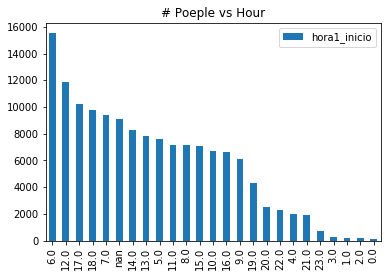

In [11]:
roh = pd.DataFrame(df.hora1_inicio.value_counts(dropna=False, normalize=False)).plot(kind='bar', title='# Poeple vs Hour')


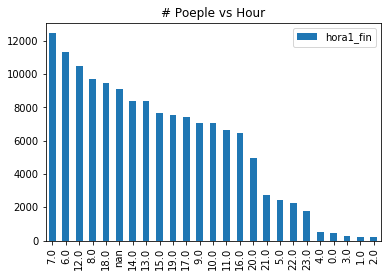

In [12]:
roh = pd.DataFrame(df.hora1_fin.value_counts(dropna=False, normalize=False)).plot(kind='bar', title='# Poeple vs Hour')


### RATE MOVILITY PER HOUR - ONLY TAXIS IN BOGOTÀ

In [13]:
df1 = df[df.MEDIO_PREDOMINANTE == 'TAXI'] 
df2 = df1[df1.MUNICIPIO_ORIGEN == 'BOGOTA-DC 11001']
rohit = pd.DataFrame(df2['hora1_inicio'].value_counts())
rohft = pd.DataFrame(df2['hora1_fin'].value_counts())
rohit.rename(columns={'hora1_inicio':'count_inicio_taxi'}, inplace=True)
rohft.rename(columns={'hora1_fin':'count_fin_taxi'}, inplace=True)
rohit['count_fin_taxi'] = rohft.count_fin_taxi
roht = rohit
roht['% inicio'] = (roht.count_inicio_taxi / len(df2)) * 100 
roht['% fin'] = (roht.count_fin_taxi / len(df2)) * 100 
roht

,count_inicio_taxi,count_fin_taxi,% inicio,% fin
12.0,319,251,8.025157,6.314465
17.0,294,218,7.396226,5.484277
6.0,272,177,6.842767,4.452830
15.0,271,243,6.817610,6.113208
7.0,254,240,6.389937,6.037736
10.0,239,233,6.012579,5.861635
8.0,238,260,5.987421,6.540881
9.0,235,253,5.911950,6.364780
11.0,228,250,5.735849,6.289308
18.0,225,230,5.660377,5.786164


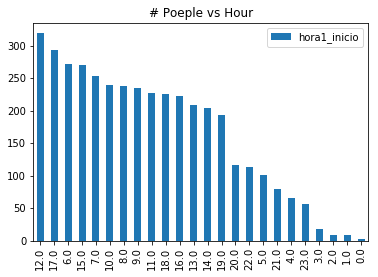

In [14]:
roh = pd.DataFrame(df2.hora1_inicio.value_counts(dropna=False, normalize=False)).plot(kind='bar', title='# Poeple vs Hour')


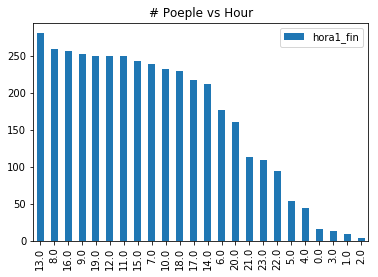

In [15]:
roh = pd.DataFrame(df2.hora1_fin.value_counts(dropna=False, normalize=False)).plot(kind='bar', title='# Poeple vs Hour')


In [16]:
df2.hora1_inicio.astype('int64')
df2[:1]
#df2.x_coord_org.astype('str')

,Unnamed: 0,ID_ENCUESTA,NUMERO_PERSONA,NUMERO_VIAJE,MOTIVOVIAJE,MUNICIPIO_DESTINO,DEPARTAMENTO_DESTINO,TIEMPO_CAMINO,HORA_INICIO,HORA_FIN,MEDIO_PREDOMINANTE,ZAT_DESTINO,ZAT_ORIGEN,MUNICIPIO_ORIGEN,DEPARTAMENTO_ORIGEN,LATITUD_ORIGEN,LATITUD_DESTINO,LONGITUD_ORIGEN,LONGITUD_DESTINO,DIFERENCIA_HORAS,DIA_HABIL,DIA_NOHABIL,PICO_HABIL,PICO_NOHABIL,VALLE_NOHABIL,VALLE_HABIL,y_coord_org,x_coord_org,y_coord_dest,x_coord_dest,hora1_inicio,hora1_fin
31,31,18515383.0,2.0,1.0,Buscar/dejar dejar algo,BOGOTA-DC 11001,Bogota D.C.,15.0,16:02:00,16:48:00,TAXI,238.0,363.0,BOGOTA-DC 11001,Bogota D.C.,4.617991e+13,4.650208e+13,-7.408767e+13,-7.406807e+13,00:46:00,S,NaN,NaN,NaN,NaN,NaN,4.615035,-74.086953,4.652134,-74.068821,16.0,16.0


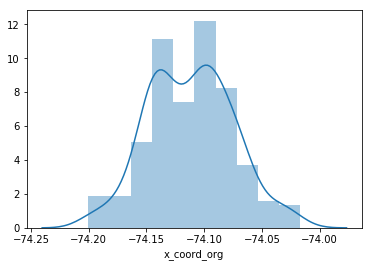

In [17]:
sns.distplot(df2.loc[(df2.hora1_inicio >= 0) & (df2.hora1_inicio < 6), 'x_coord_org'])
#sns.distplot(df2.loc[(df2.hora1_inicio > 0) & (df2.hora1_inicio < 9), 'y_coord_org'])

## Blocks of the day (6 hours)

In [18]:
early_morning = df2.loc[(df2.hora1_inicio >= 0) & (df2.hora1_inicio < 6)]
morning = df2.loc[(df2.hora1_inicio >= 6) & (df2.hora1_inicio < 12)]
late = df2.loc[(df2.hora1_inicio >= 12) & (df2.hora1_inicio < 18)]
night = df2.loc[(df2.hora1_inicio >= 18) & (df2.hora1_inicio < 24)]

## Distribution x_cord_org VS y_cord_org by Blocks 

### - Early_morning

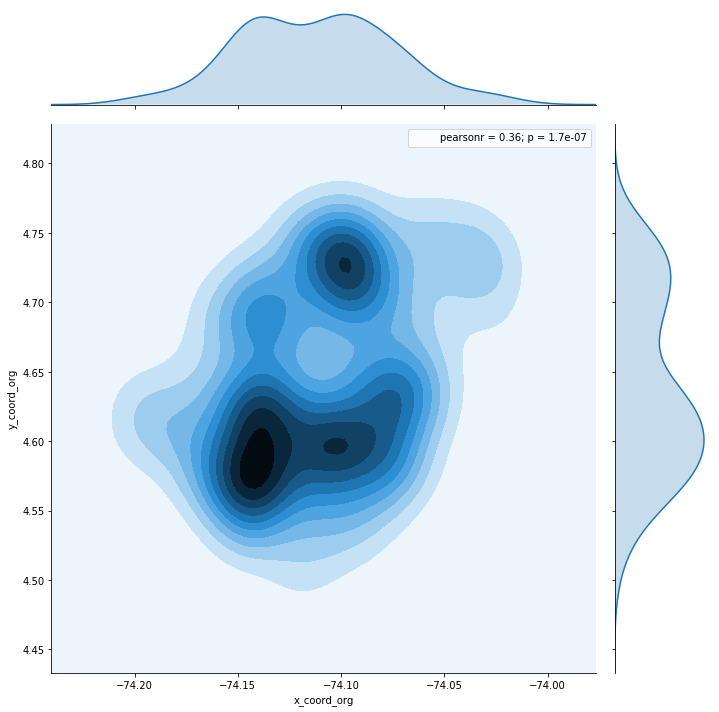

In [19]:
sns.jointplot(x="x_coord_org", y="y_coord_org", data=early_morning, kind="kde", size=10)
plt.show()

### - Morning

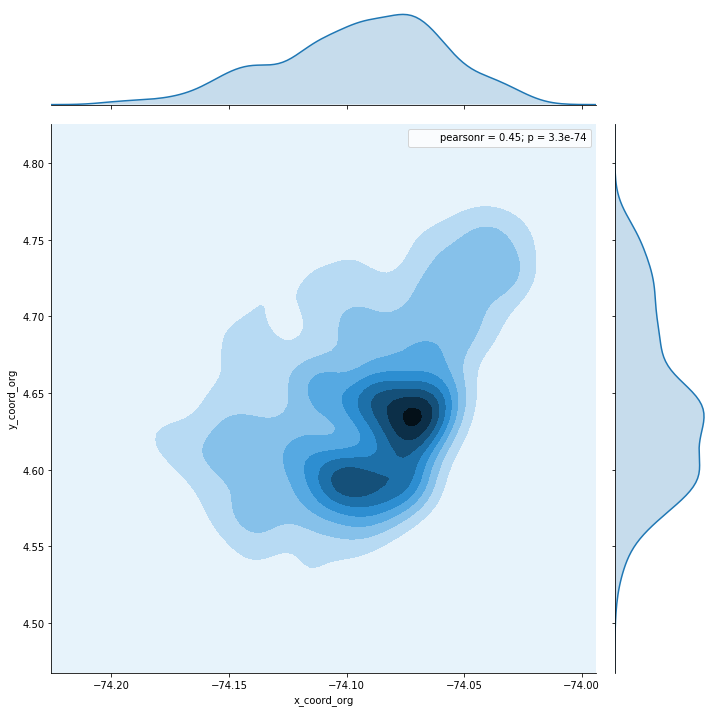

In [20]:
sns.jointplot(x="x_coord_org", y="y_coord_org", data=morning, kind="kde", size=10)
plt.show()

### - Late

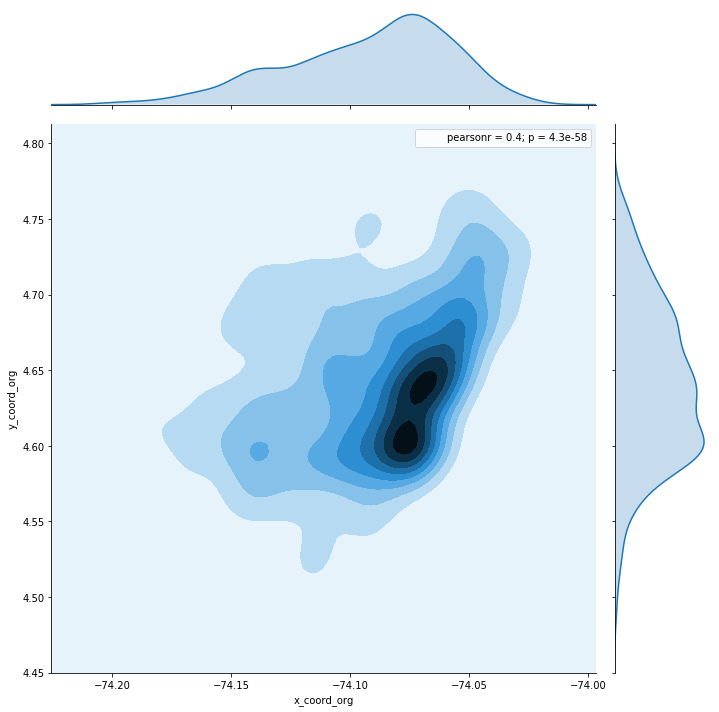

In [21]:
sns.jointplot(x="x_coord_org", y="y_coord_org", data=late, kind="kde", size=10)
plt.show()

### - Night

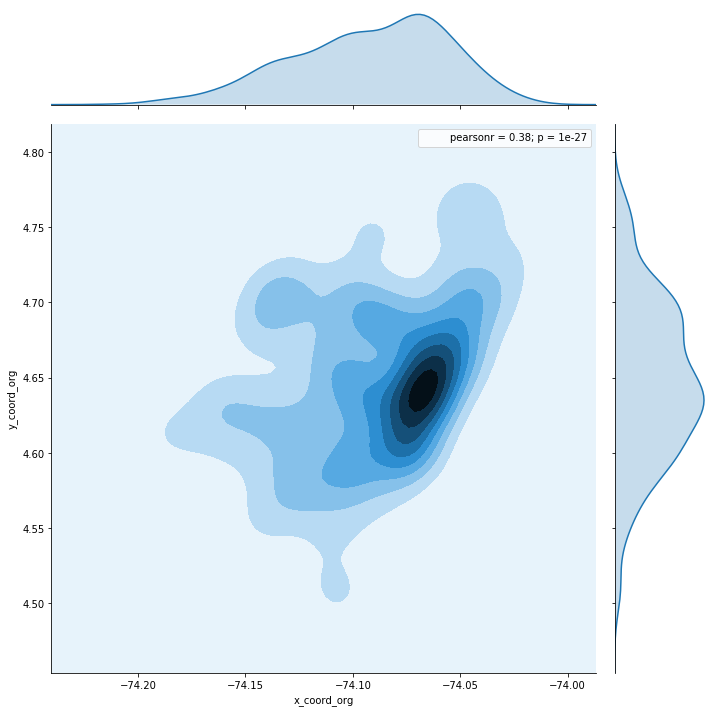

In [22]:
sns.jointplot(x="x_coord_org", y="y_coord_org", data=night, kind="kde", size=10)
plt.show()

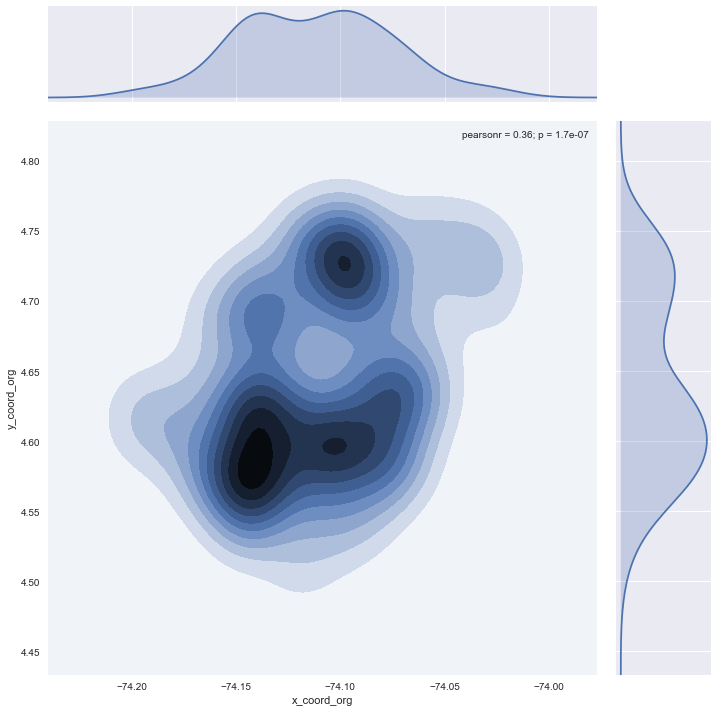

In [23]:
t1 = 100
t2 = 1000
graphs = [('imgs/Bivariate graphs/Time Blocks/early_morning.png', t1),
          ('imgs/Bivariate graphs/Time Blocks/morning.png', t1),
          ('imgs/Bivariate graphs/Time Blocks/late.png',t1),
          ('imgs/Bivariate graphs/Time Blocks/night.png', t2)]

anima = APNG()
for archivo, delay in graphs:
    anima.append(archivo, delay=delay)
anima.save('imgs/Bivariate graphs/Time Blocks/animTimeB.png')
Image(filename='imgs/Bivariate graphs/Time Blocks/animTimeB.png')


## Per hours

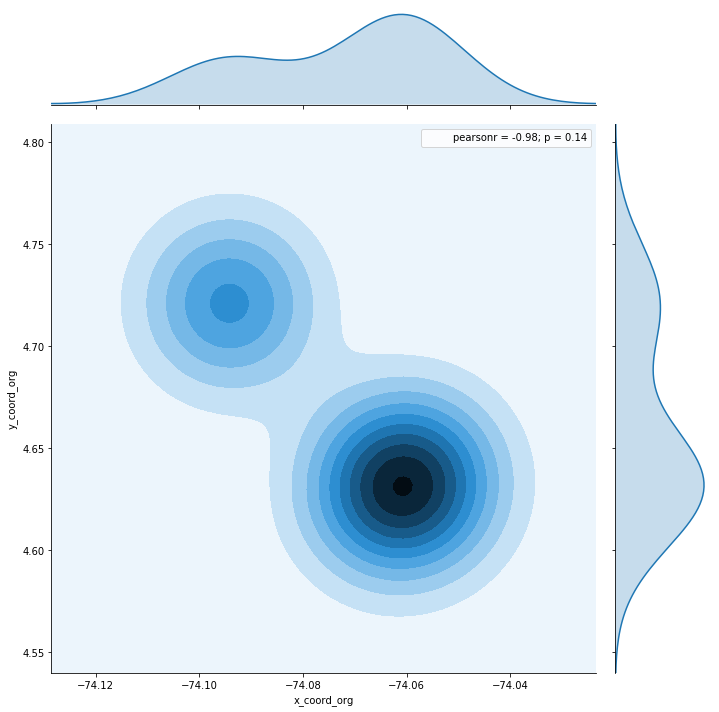

In [24]:
h0 = df2.loc[(df2.hora1_inicio == 0)]
sns.jointplot(x="x_coord_org", y="y_coord_org", data=h0, kind="kde", size=10)
plt.show()

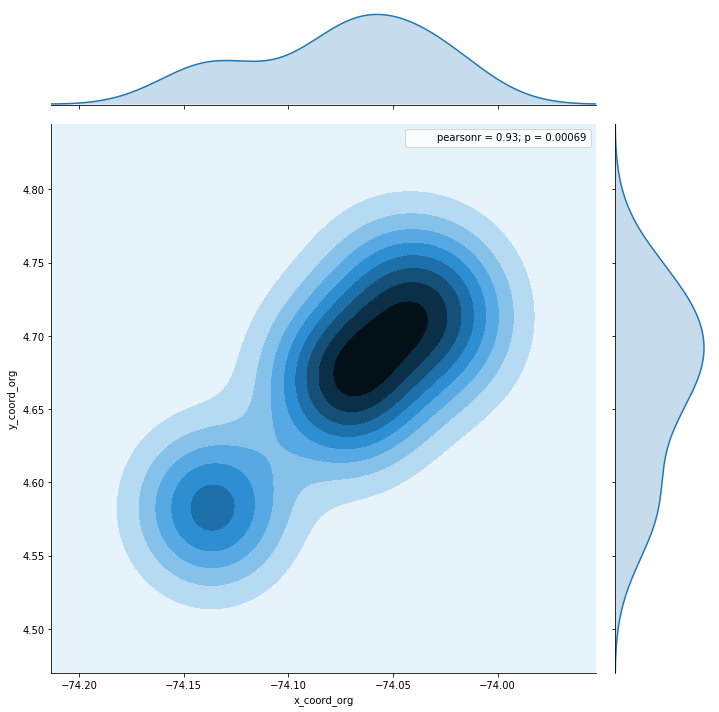

In [25]:
h1 = df2.loc[(df2.hora1_inicio == 1)]
sns.jointplot(x="x_coord_org", y="y_coord_org", data=h1, kind="kde", size=10)
plt.show()

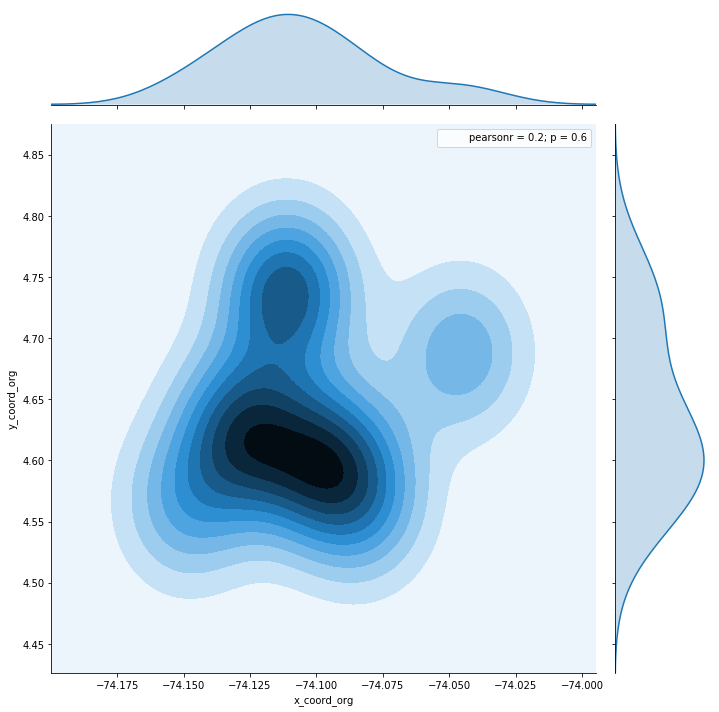

In [26]:
h2 = df2.loc[(df2.hora1_inicio == 2)]
sns.jointplot(x="x_coord_org", y="y_coord_org", data=h2, kind="kde", size=10)
plt.show()

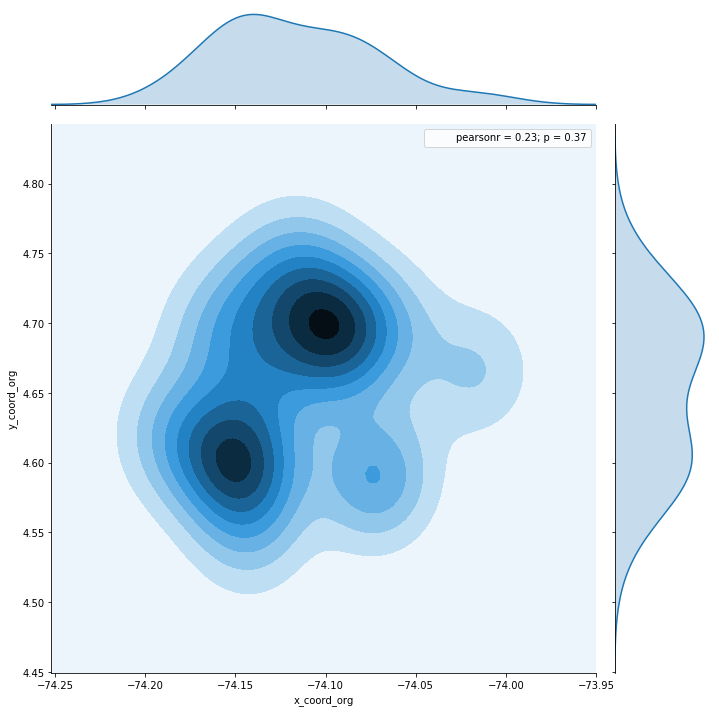

In [27]:
h3 = df2.loc[(df2.hora1_inicio == 3)]
sns.jointplot(x="x_coord_org", y="y_coord_org", data=h3, kind="kde", size=10)
plt.show()

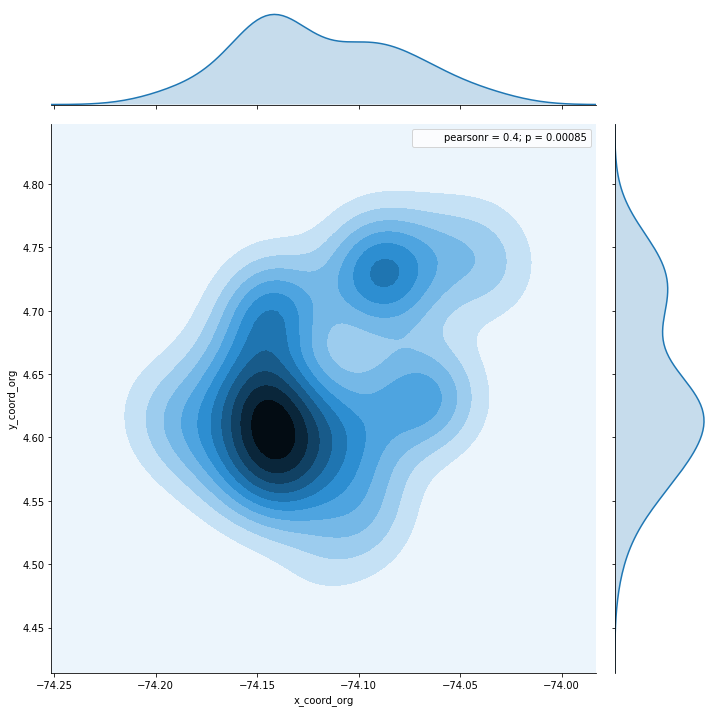

In [28]:
h4 = df2.loc[(df2.hora1_inicio == 4)]
sns.jointplot(x="x_coord_org", y="y_coord_org", data=h4, kind="kde", size=10)
plt.show()

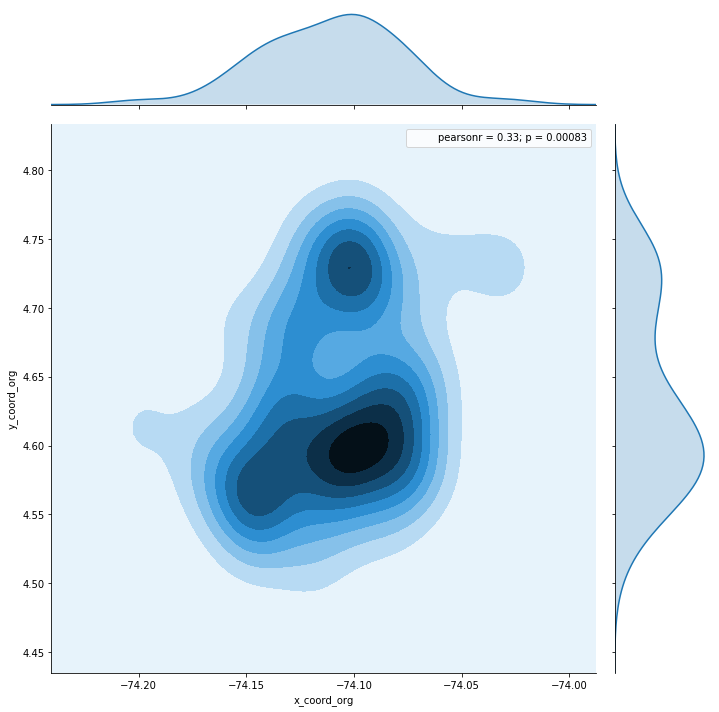

In [29]:
h5 = df2.loc[(df2.hora1_inicio == 5)]
sns.jointplot(x="x_coord_org", y="y_coord_org", data=h5, kind="kde", size=10)
plt.show()

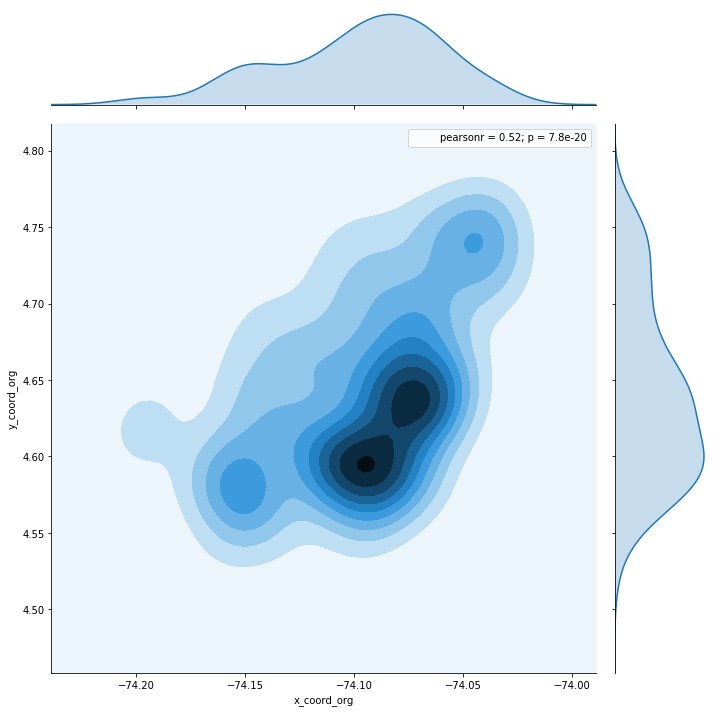

In [30]:
h6 = df2.loc[(df2.hora1_inicio == 6)]
sns.jointplot(x="x_coord_org", y="y_coord_org", data=h6, kind="kde", size=10)
plt.show()

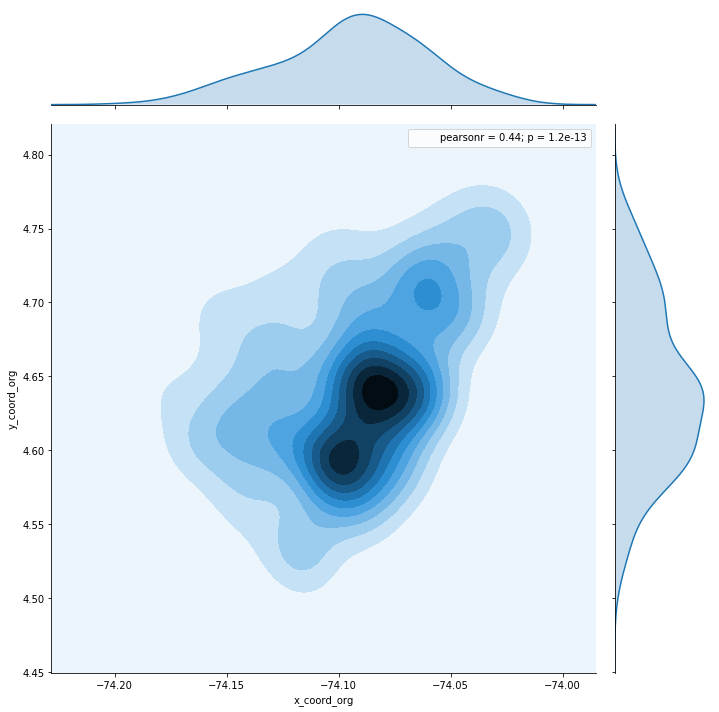

In [31]:
h7 = df2.loc[(df2.hora1_inicio == 7)]
sns.jointplot(x="x_coord_org", y="y_coord_org", data=h7, kind="kde", size=10)
plt.show()

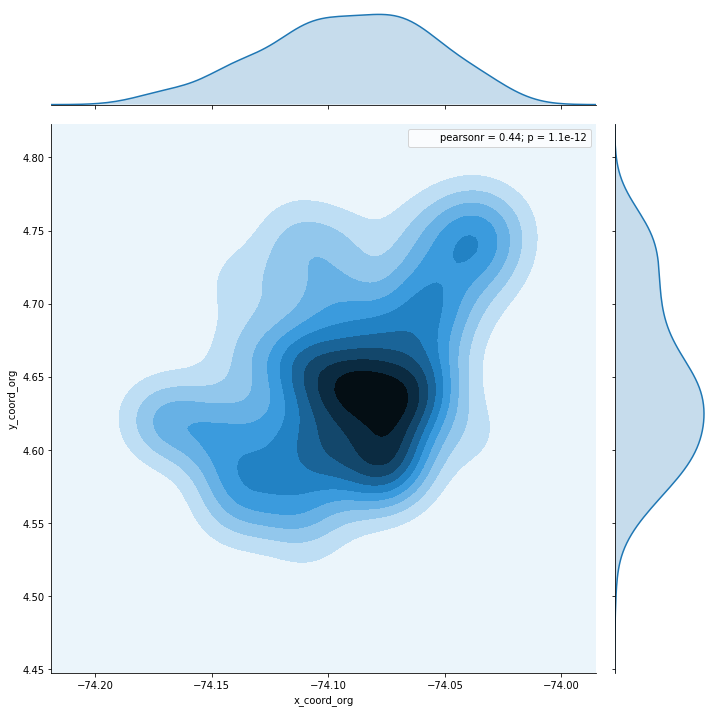

In [32]:
h8 = df2.loc[(df2.hora1_inicio == 8)]
sns.jointplot(x="x_coord_org", y="y_coord_org", data=h8, kind="kde", size=10)
plt.show()

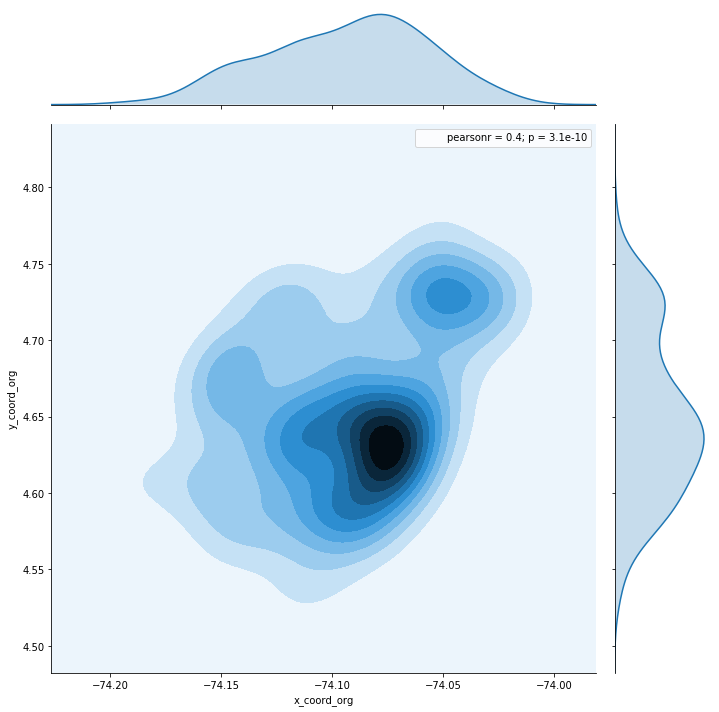

In [33]:
h9 = df2.loc[(df2.hora1_inicio == 9)]
sns.jointplot(x="x_coord_org", y="y_coord_org", data=h9, kind="kde", size=10)
plt.show()

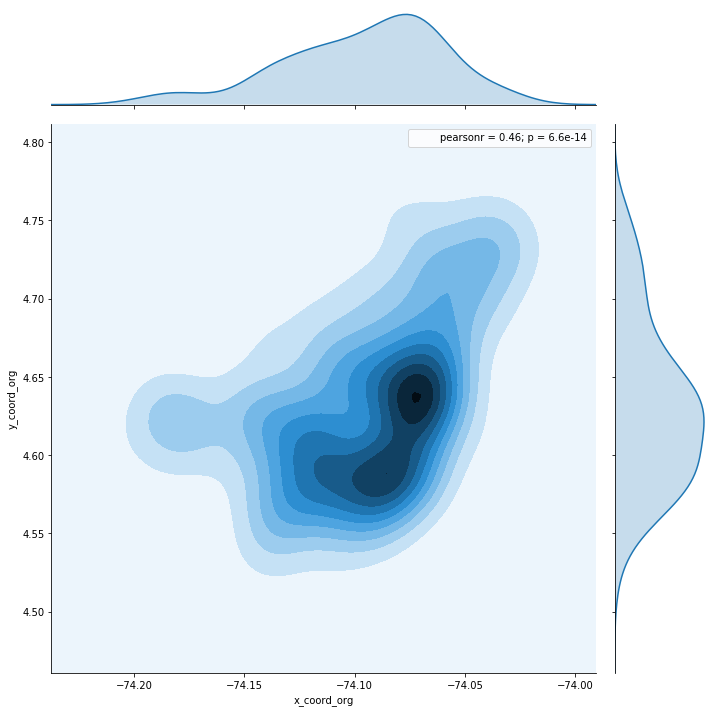

In [34]:
h10 = df2.loc[(df2.hora1_inicio == 10)]
sns.jointplot(x="x_coord_org", y="y_coord_org", data=h10, kind="kde", size=10)
plt.show()

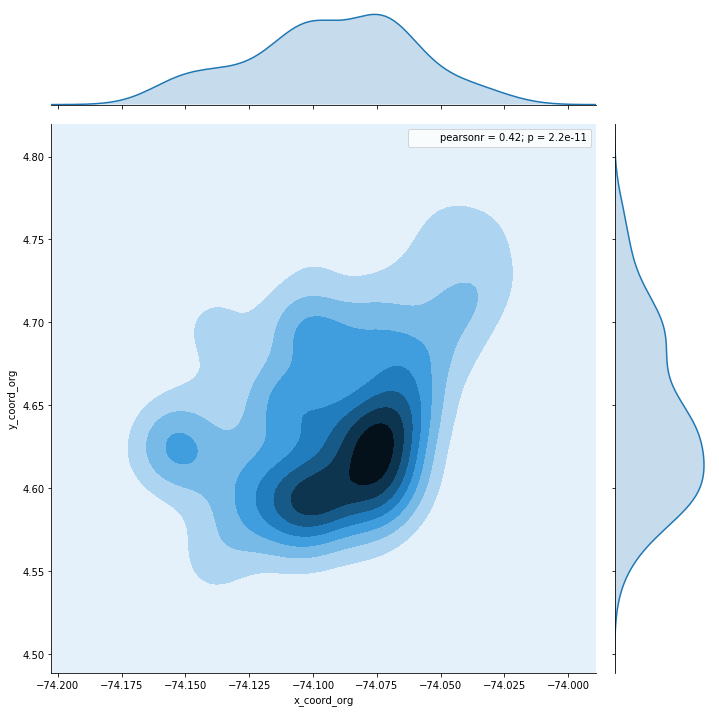

In [35]:
h11 = df2.loc[(df2.hora1_inicio == 11)]
sns.jointplot(x="x_coord_org", y="y_coord_org", data=h11, kind="kde", size=10)
plt.show()

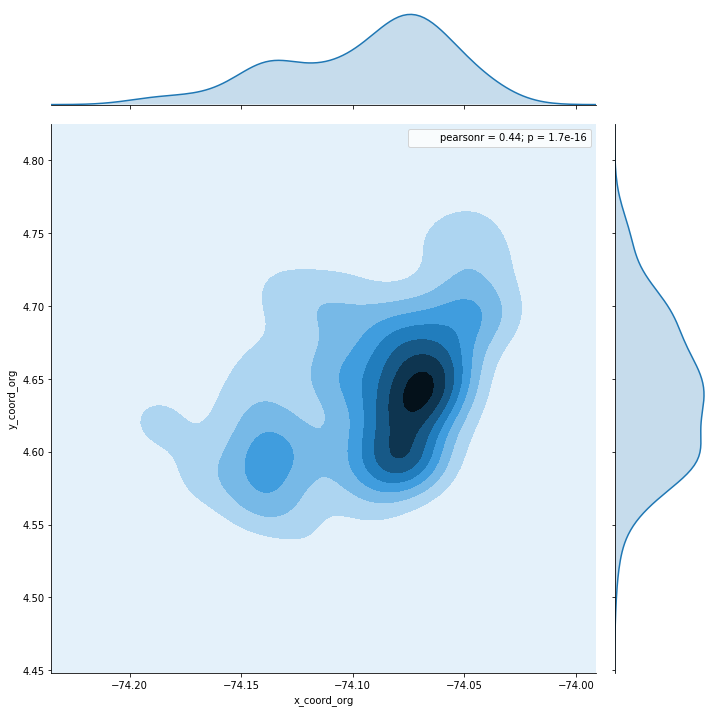

In [36]:
h12 = df2.loc[(df2.hora1_inicio == 12)]
sns.jointplot(x="x_coord_org", y="y_coord_org", data=h12, kind="kde", size=10)
plt.show()

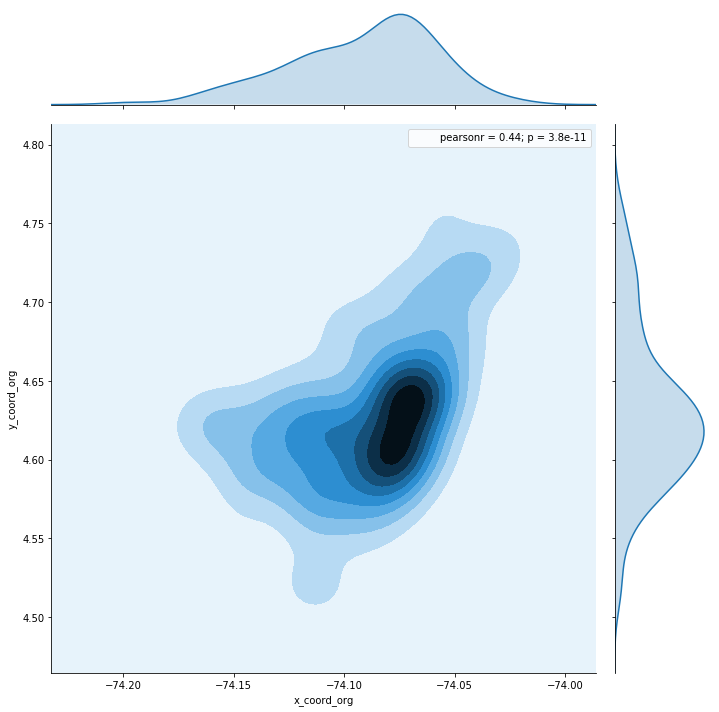

In [37]:
h13 = df2.loc[(df2.hora1_inicio == 13)]
sns.jointplot(x="x_coord_org", y="y_coord_org", data=h13, kind="kde", size=10)
plt.show()

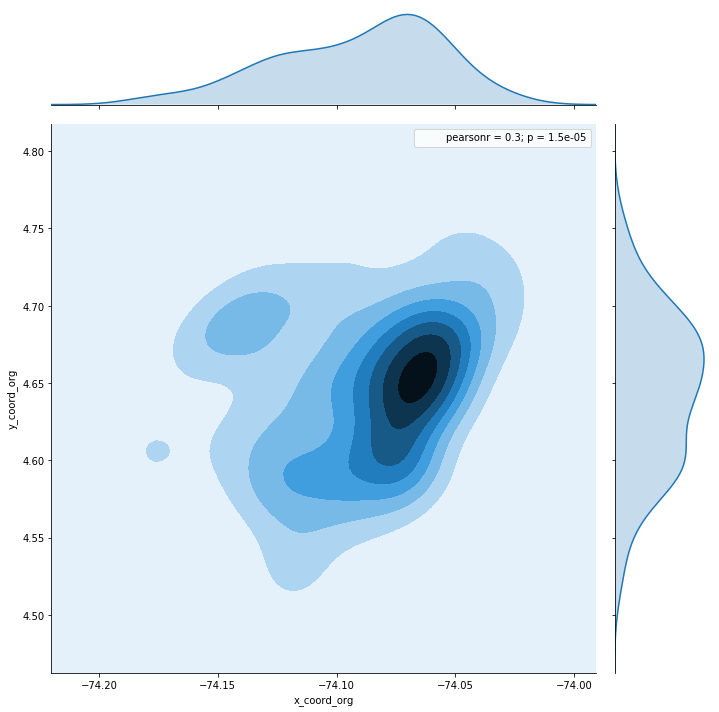

In [38]:
h14 = df2.loc[(df2.hora1_inicio == 14)]
sns.jointplot(x="x_coord_org", y="y_coord_org", data=h14, kind="kde", size=10)
plt.show()

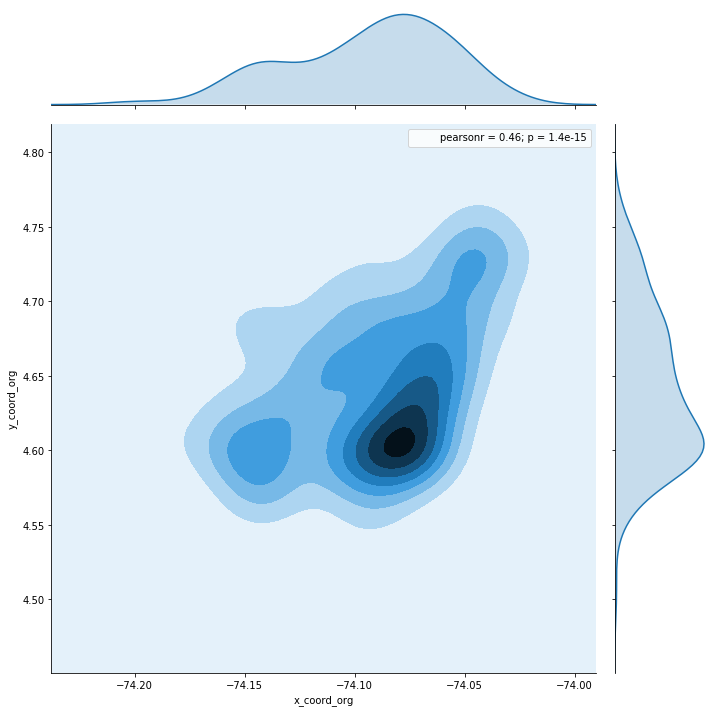

In [39]:
h15 = df2.loc[(df2.hora1_inicio == 15)]
sns.jointplot(x="x_coord_org", y="y_coord_org", data=h15, kind="kde", size=10)
plt.show()

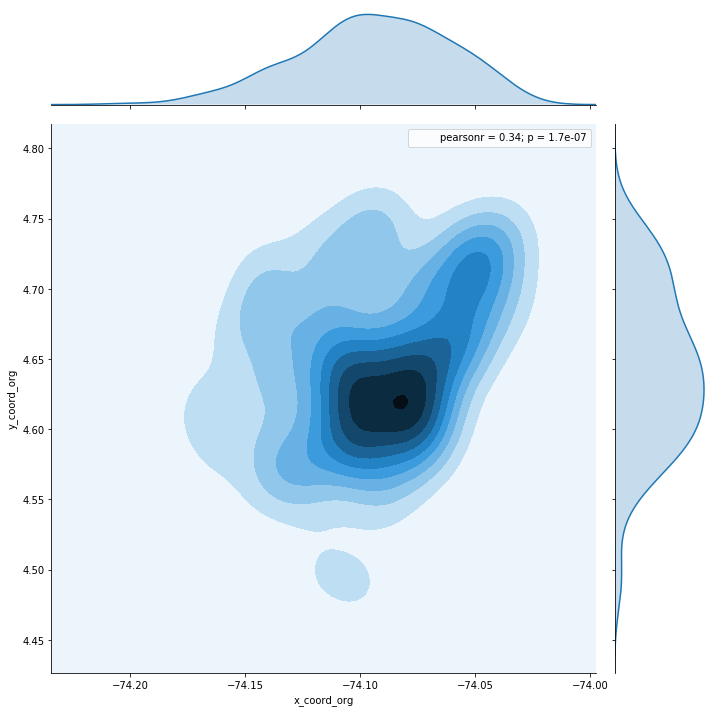

In [40]:
h16 = df2.loc[(df2.hora1_inicio == 16)]
sns.jointplot(x="x_coord_org", y="y_coord_org", data=h16, kind="kde", size=10)
plt.show()

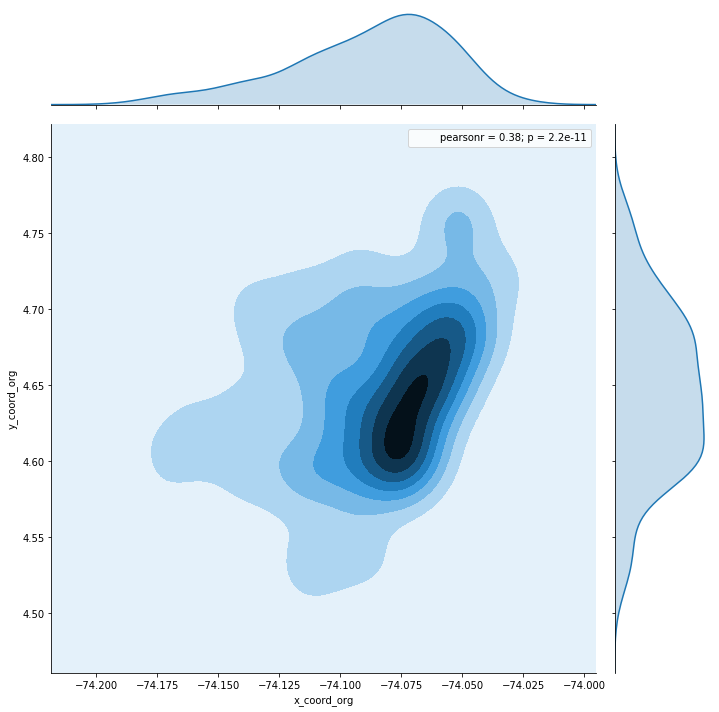

In [41]:
h17 = df2.loc[(df2.hora1_inicio == 17)]
sns.jointplot(x="x_coord_org", y="y_coord_org", data=h17, kind="kde", size=10)
plt.show()

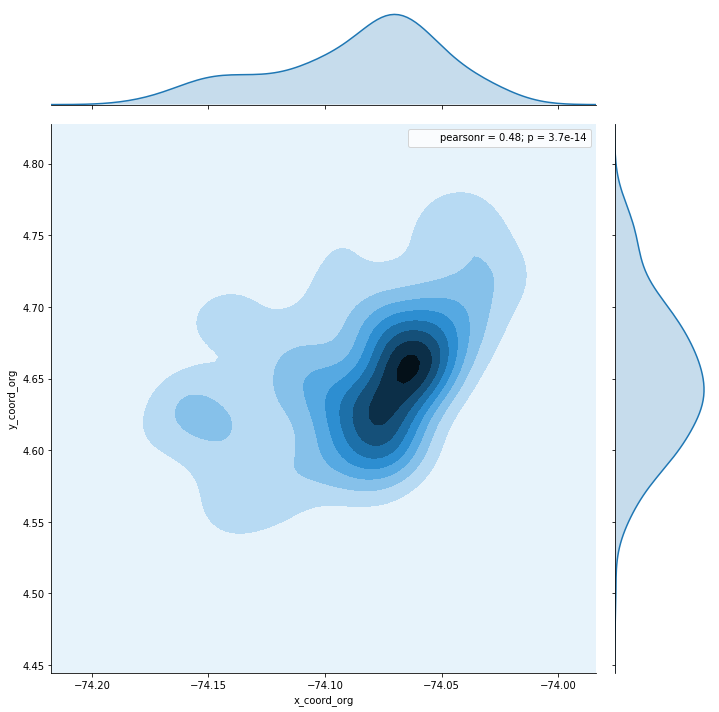

In [42]:
h18 = df2.loc[(df2.hora1_inicio == 18)]
sns.jointplot(x="x_coord_org", y="y_coord_org", data=h18, kind="kde", size=10)
plt.show()

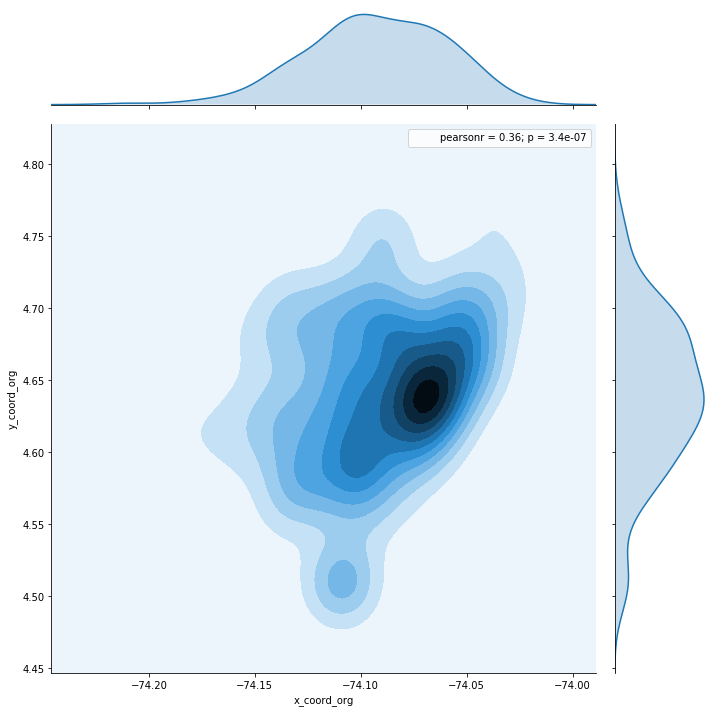

In [43]:
h19 = df2.loc[(df2.hora1_inicio == 19)]
sns.jointplot(x="x_coord_org", y="y_coord_org", data=h19, kind="kde", size=10)
plt.show()

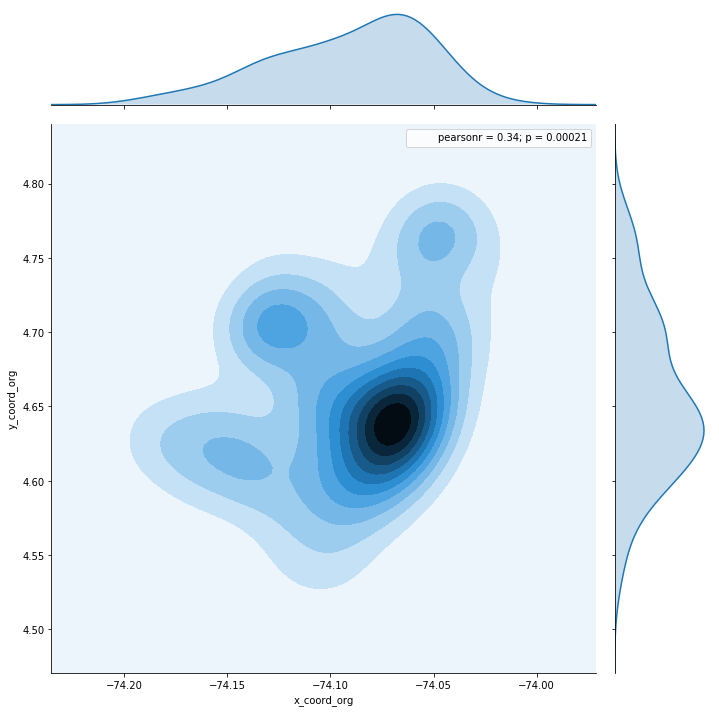

In [44]:
h20 = df2.loc[(df2.hora1_inicio == 20)]
sns.jointplot(x="x_coord_org", y="y_coord_org", data=h20, kind="kde", size=10)
plt.show()

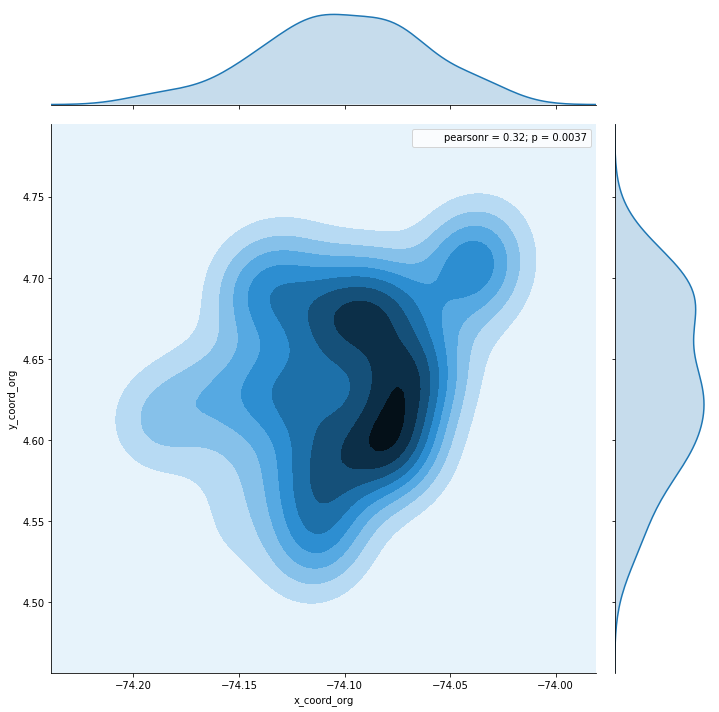

In [45]:
h21 = df2.loc[(df2.hora1_inicio == 21)]
sns.jointplot(x="x_coord_org", y="y_coord_org", data=h21, kind="kde", size=10)
plt.show()

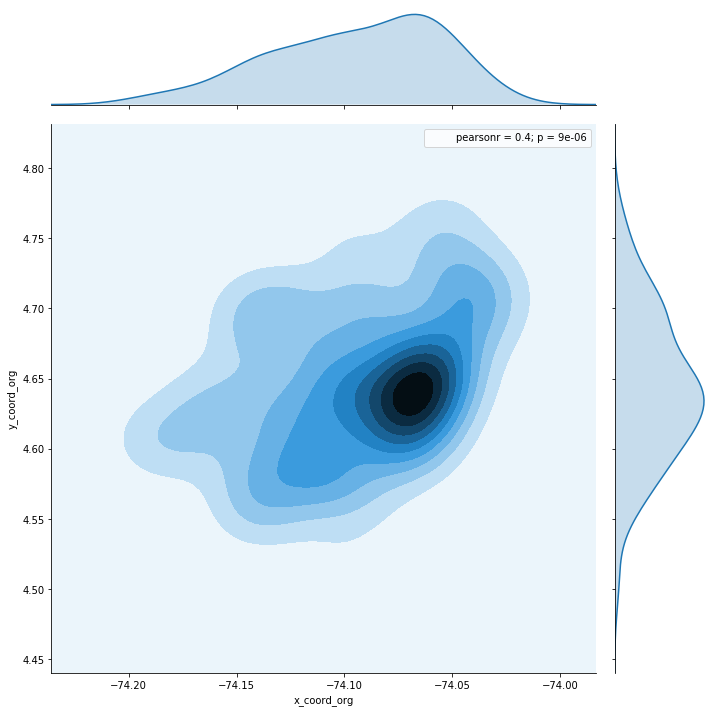

In [46]:
h22 = df2.loc[(df2.hora1_inicio == 22)]
sns.jointplot(x="x_coord_org", y="y_coord_org", data=h22, kind="kde", size=10)
plt.show()

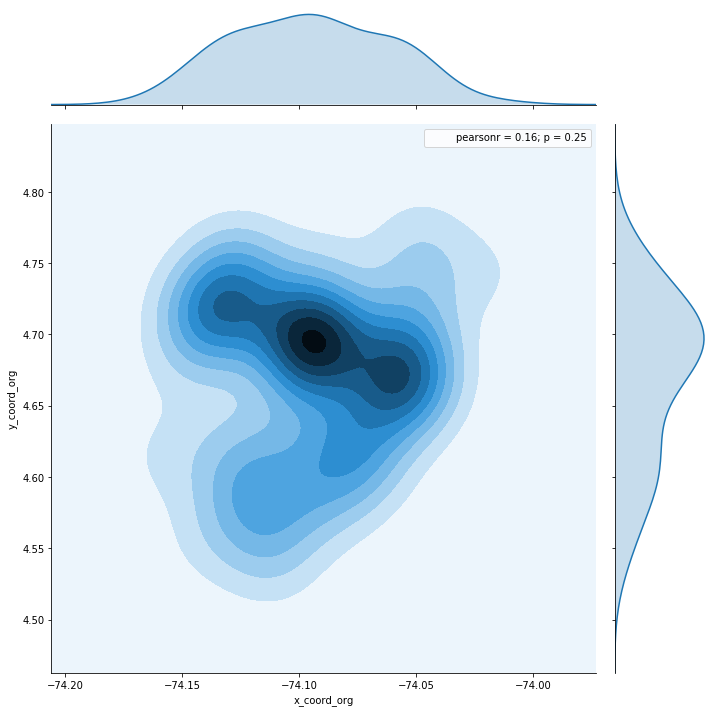

In [47]:
h23 = df2.loc[(df2.hora1_inicio == 23)]
sns.jointplot(x="x_coord_org", y="y_coord_org", data=h23, kind="kde", size=10)
plt.show()

## Other form

os.mkdir('imgs/Univariate graphs/Other/x_org')
os.mkdir('imgs/Univariate graphs/Other/y_org')

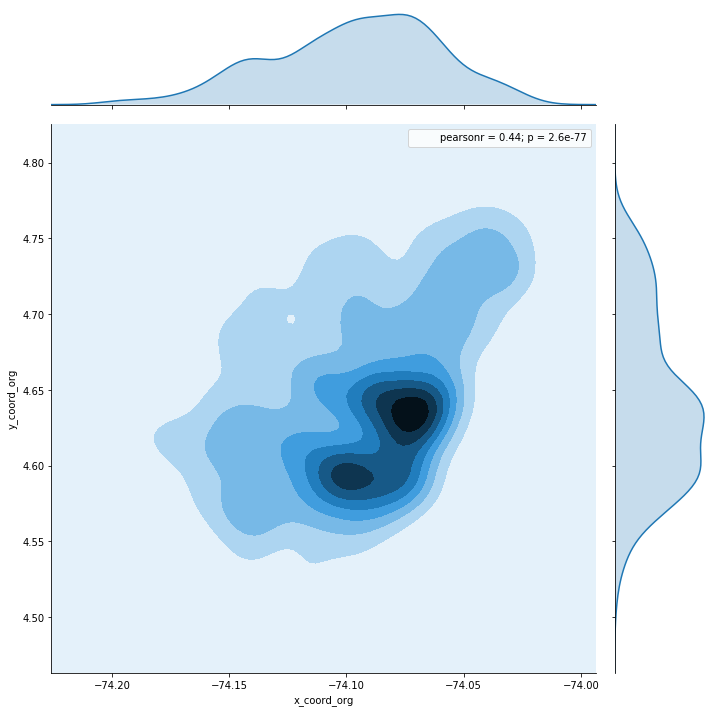

In [48]:
h4_11 = df2.loc[(df2.hora1_inicio >= 4) & (df2.hora1_inicio < 12)]
sns.jointplot(x="x_coord_org", y="y_coord_org", data=h4_11, kind="kde", size=10)
plt.savefig('imgs/Bivariate graphs/Other/h4_11.png')

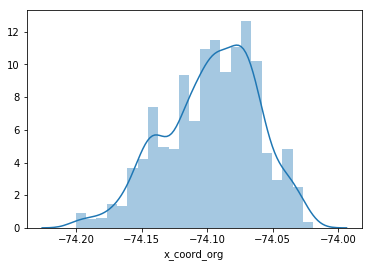

In [49]:
sns.distplot(df2.loc[(df2.hora1_inicio >= 4) & (df2.hora1_inicio < 12), 'x_coord_org'])
plt.savefig('imgs/Univariate graphs/Other/x_org/x_h4_11.png')

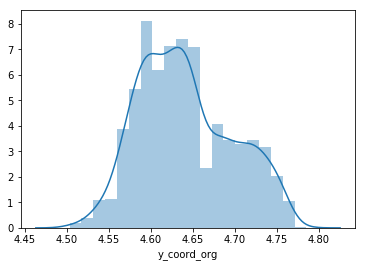

In [50]:
sns.distplot(df2.loc[(df2.hora1_inicio >= 4) & (df2.hora1_inicio < 12), 'y_coord_org'])
plt.savefig('imgs/Univariate graphs/Other/y_org/y_h4_11.png')

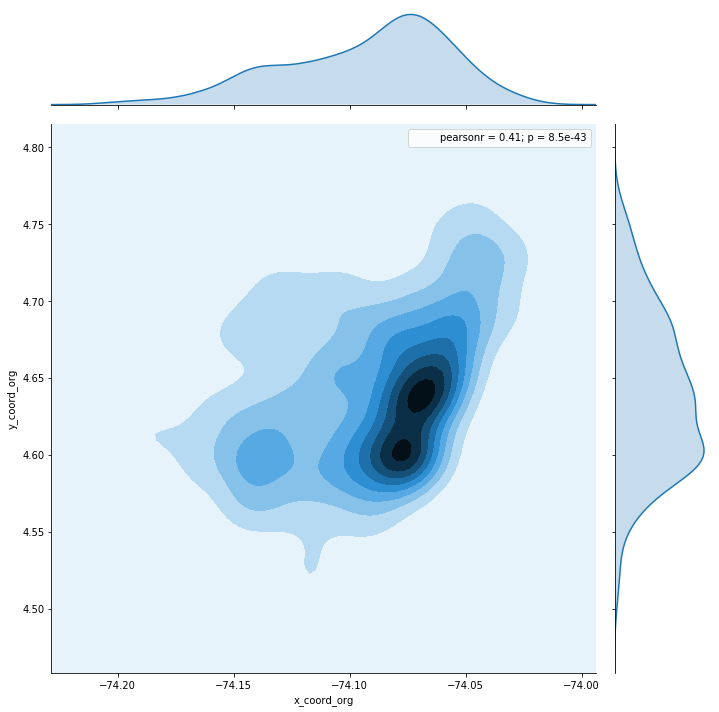

In [51]:
h12_16 = df2.loc[(df2.hora1_inicio >= 12) & (df2.hora1_inicio < 16)]
sns.jointplot(x="x_coord_org", y="y_coord_org", data=h12_16, kind="kde", size=10)
plt.savefig(plt.savefig('imgs/Bivariate graphs/Other/h12_16.png'))

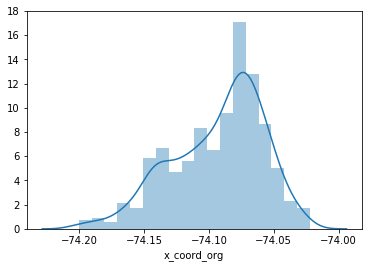

In [52]:
sns.distplot(df2.loc[(df2.hora1_inicio >= 12) & (df2.hora1_inicio < 16), 'x_coord_org'])
plt.savefig('imgs/Univariate graphs/Other/x_org/x_h12_16.png')

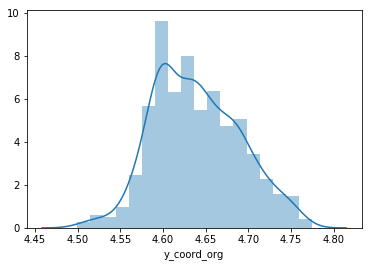

In [53]:
sns.distplot(df2.loc[(df2.hora1_inicio >= 12) & (df2.hora1_inicio < 16), 'y_coord_org'])
plt.savefig('imgs/Univariate graphs/Other/y_org/y_h12_16.png')

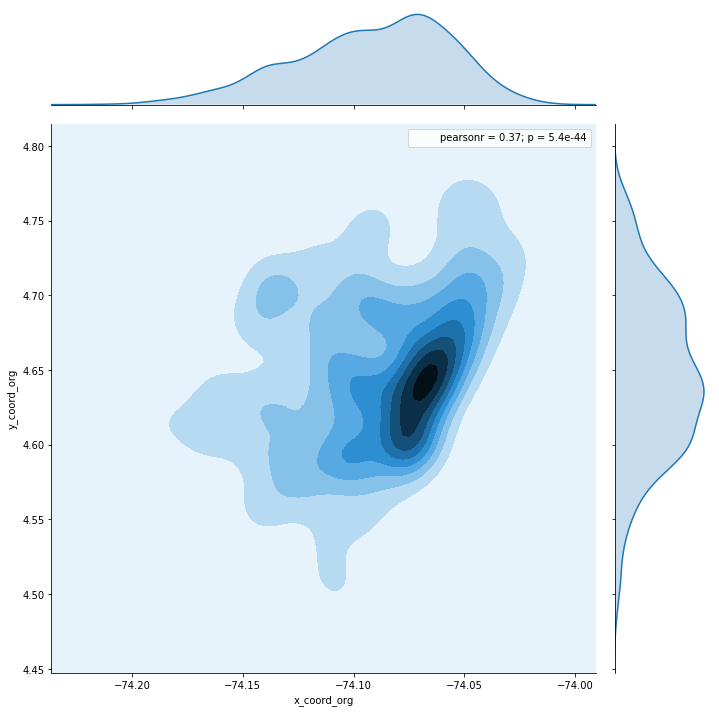

In [54]:
h17_23 = df2.loc[((df2.hora1_inicio >= 16) & (df2.hora1_inicio <24))]
h23_3 = df2.loc[((df2.hora1_inicio >= 0) & (df2.hora1_inicio <4))]
h17_3 = h17_23.append(h23_3)

sns.jointplot(x="x_coord_org", y="y_coord_org", data=h17_3, kind="kde", size=10)
plt.savefig('imgs/Bivariate graphs/Other/h17_3.png')

## Time Blocks whit 'Pico y Placa'

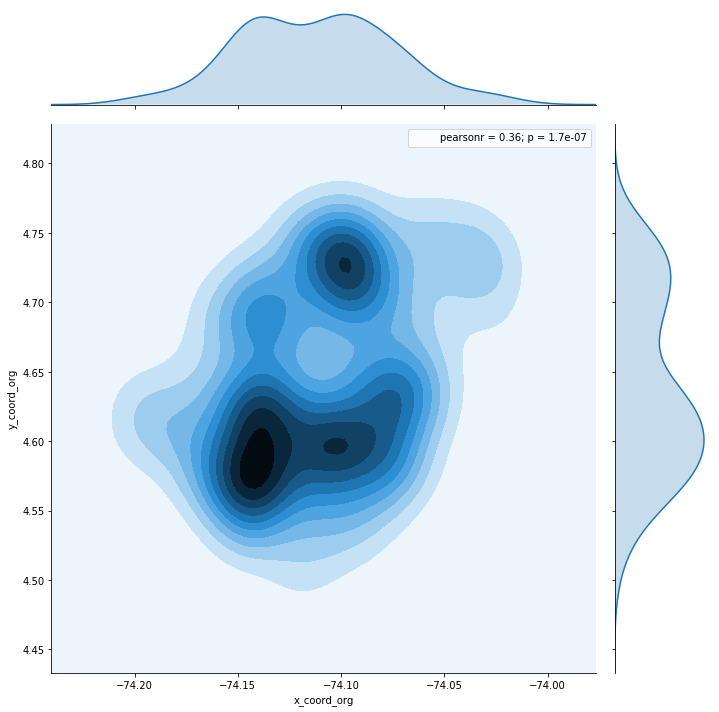

In [55]:
#os.mkdir('imgs/Bivariate graphs/picoYplaca')
pp0_6 = df2.loc[(df2.hora1_inicio >= 0) & (df2.hora1_inicio < 6)]
sns.jointplot(x="x_coord_org", y="y_coord_org", data=pp0_6, kind="kde", size=10)
plt.savefig(plt.savefig('imgs/Bivariate graphs/picoYplaca/pp0_6.png'))

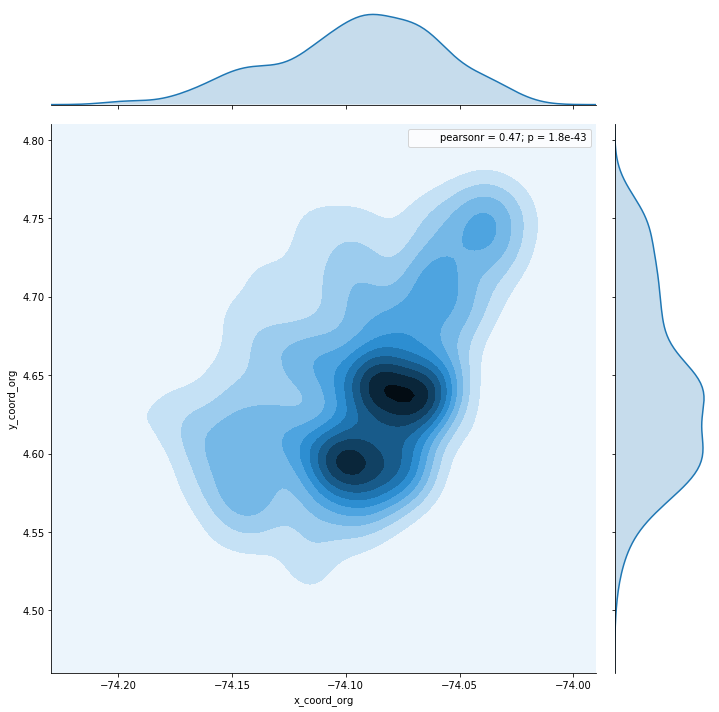

In [56]:
pp6_9 = df2.loc[(df2.hora1_inicio >= 6) & (df2.hora1_inicio < 9)]
sns.jointplot(x="x_coord_org", y="y_coord_org", data=pp6_9, kind="kde", size=10)
plt.savefig(plt.savefig('imgs/Bivariate graphs/picoYplaca/pp6_9.png'))

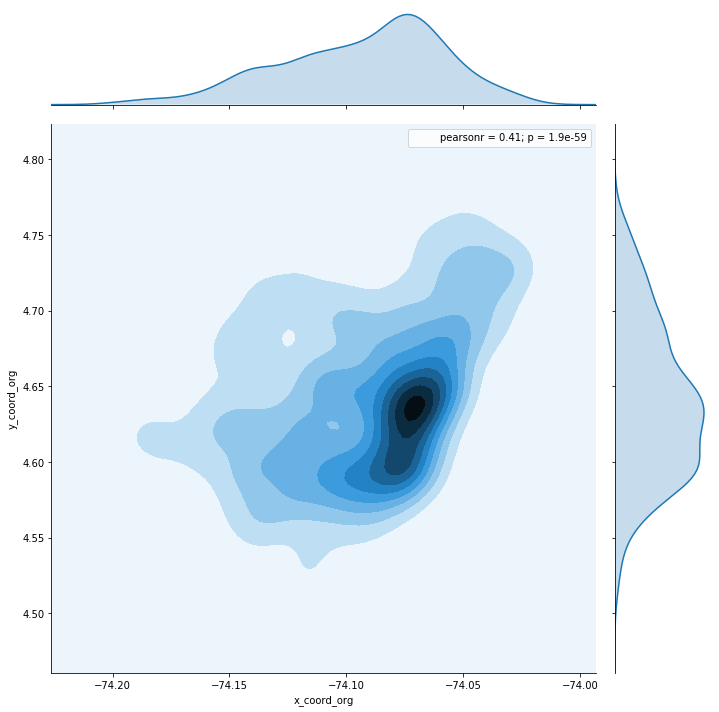

In [57]:
pp9_15 = df2.loc[(df2.hora1_inicio >= 9) & (df2.hora1_inicio < 15)]
sns.jointplot(x="x_coord_org", y="y_coord_org", data=pp9_15, kind="kde", size=10)
plt.savefig(plt.savefig('imgs/Bivariate graphs/picoYplaca/pp9_15.png'))

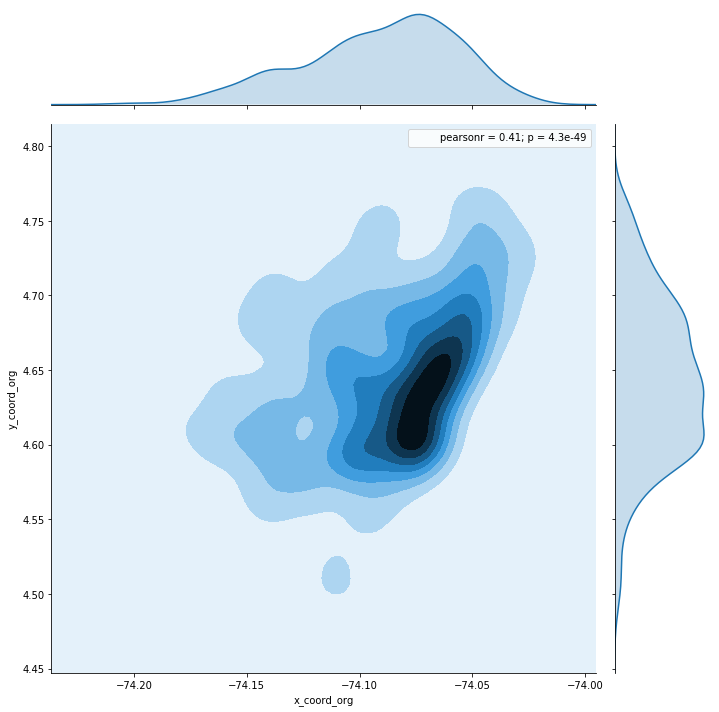

In [58]:
pp15_20 = df2.loc[(df2.hora1_inicio >= 15) & (df2.hora1_inicio < 20)]
sns.jointplot(x="x_coord_org", y="y_coord_org", data=pp15_20, kind="kde", size=10)
plt.savefig(plt.savefig('imgs/Bivariate graphs/picoYplaca/pp15_20.png'))

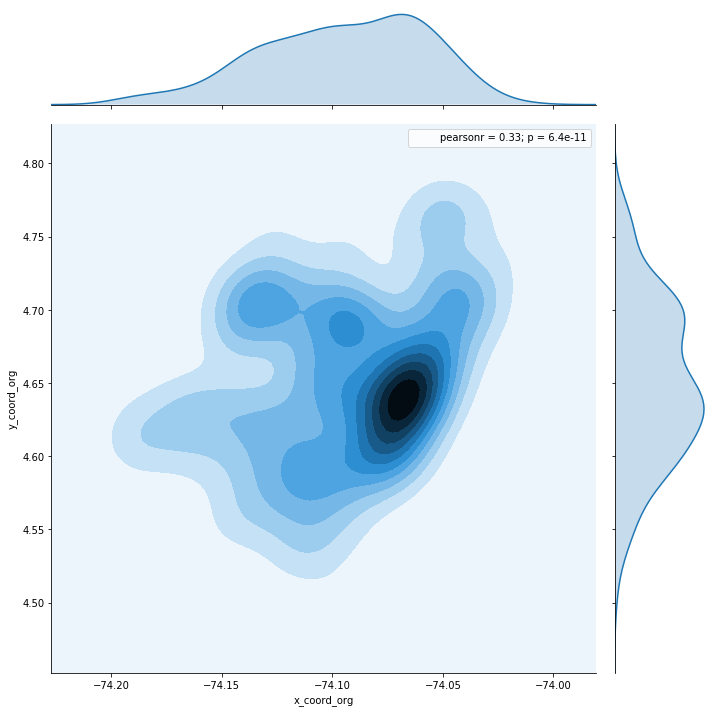

In [59]:
pp20_24 = df2.loc[(df2.hora1_inicio >= 20) & (df2.hora1_inicio < 24)]
sns.jointplot(x="x_coord_org", y="y_coord_org", data=pp20_24, kind="kde", size=10)
plt.savefig(plt.savefig('imgs/Bivariate graphs/picoYplaca/pp20_24.png'))

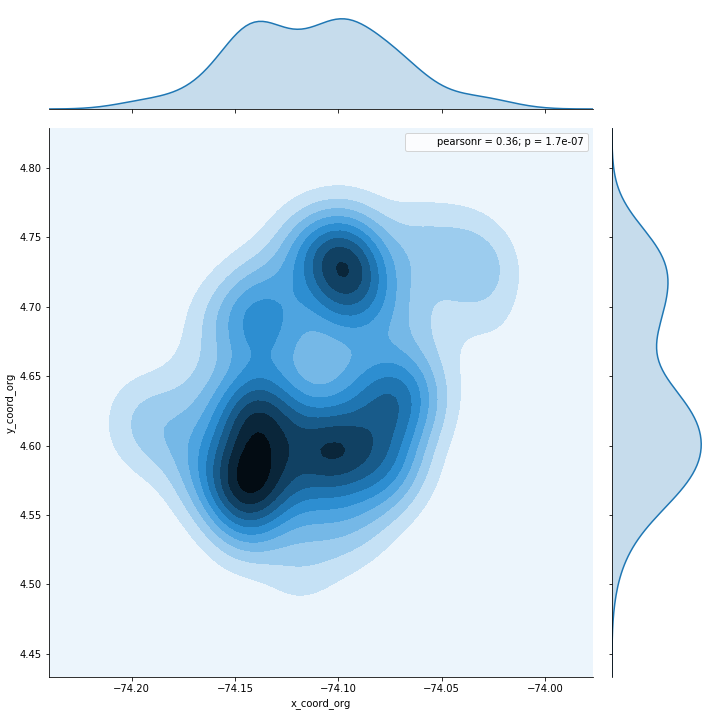

In [60]:
t1 = 400
t2 = 400
graphs = [('imgs/Bivariate graphs/picoYplaca/pp0_6.png', t1),
          ('imgs/Bivariate graphs/picoYplaca/pp6_9.png', t1),
          ('imgs/Bivariate graphs/picoYplaca/pp9_15.png',t1),
          ('imgs/Bivariate graphs/picoYplaca/pp15_20.png', t1),
          ('imgs/Bivariate graphs/picoYplaca/pp20_24.png', t2)]

anima = APNG()
for archivo, delay in graphs:
    anima.append(archivo, delay=delay)
anima.save('imgs/Bivariate graphs/picoYplaca/animPyP.png')
Image(filename='imgs/Bivariate graphs/picoYplaca/animPyP.png')

# Time Blocks with 'valle' and 'pico' TM & SITP hours 

## 5-6 VALLE:

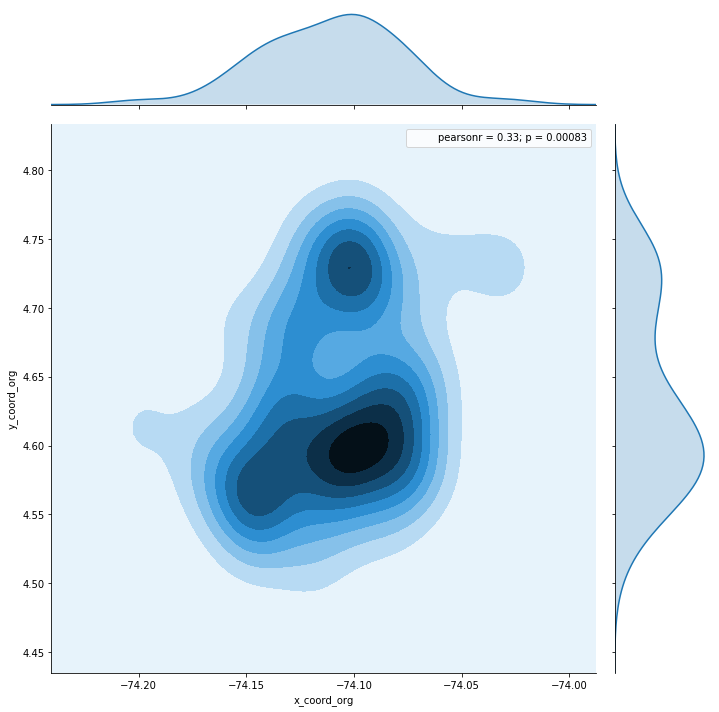

In [61]:
#os.mkdir('imgs/Bivariate graphs/TM_SITP_H')
tm5_6 = df2.loc[(df2.hora1_inicio == 5)]
sns.jointplot(x="x_coord_org", y="y_coord_org", data=tm5_6, kind="kde", size=10)
plt.savefig(plt.savefig('imgs/Bivariate graphs/TM_SITP_H/tm5_6.png'))

## 6-9 PICO:

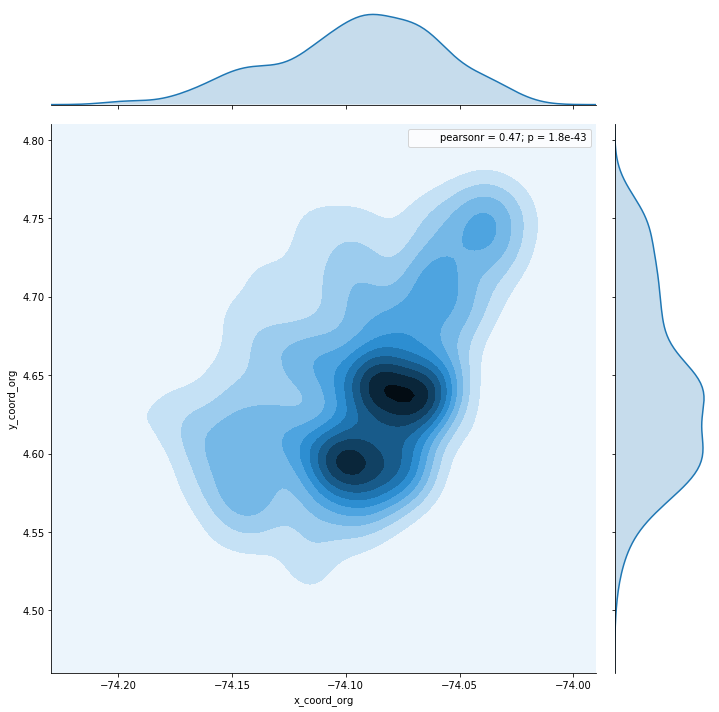

In [62]:
tm6_9 = df2.loc[(df2.hora1_inicio >= 6) & (df2.hora1_inicio < 9)]
sns.jointplot(x="x_coord_org", y="y_coord_org", data=tm6_9, kind="kde", size=10)
plt.savefig(plt.savefig('imgs/Bivariate graphs/TM_SITP_H/tm6_9.png'))

## 9-10 VALLE:

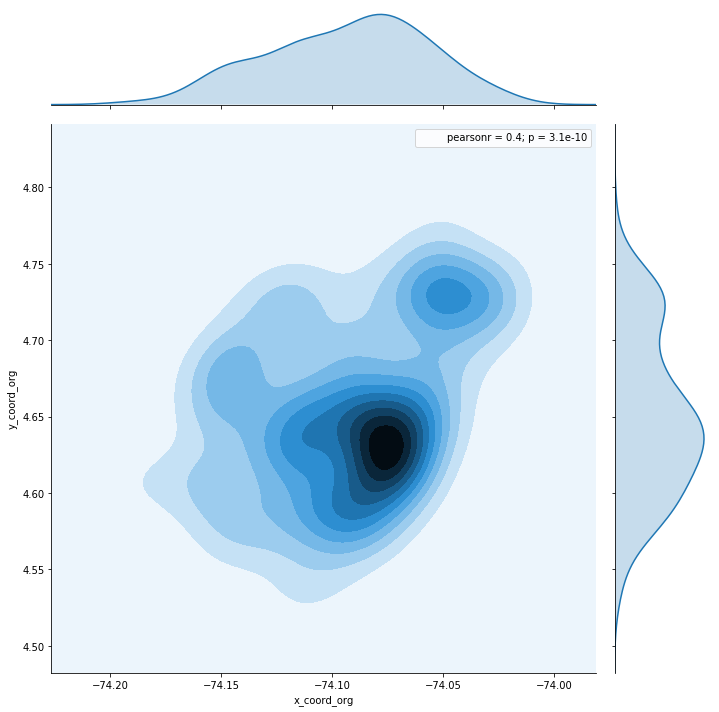

In [63]:
tm9_10 = df2.loc[(df2.hora1_inicio >= 9) & (df2.hora1_inicio < 10)]
sns.jointplot(x="x_coord_org", y="y_coord_org", data=tm9_10, kind="kde", size=10)
plt.savefig(plt.savefig('imgs/Bivariate graphs/TM_SITP_H/tm9_10.png'))

## 10-16 PICO:

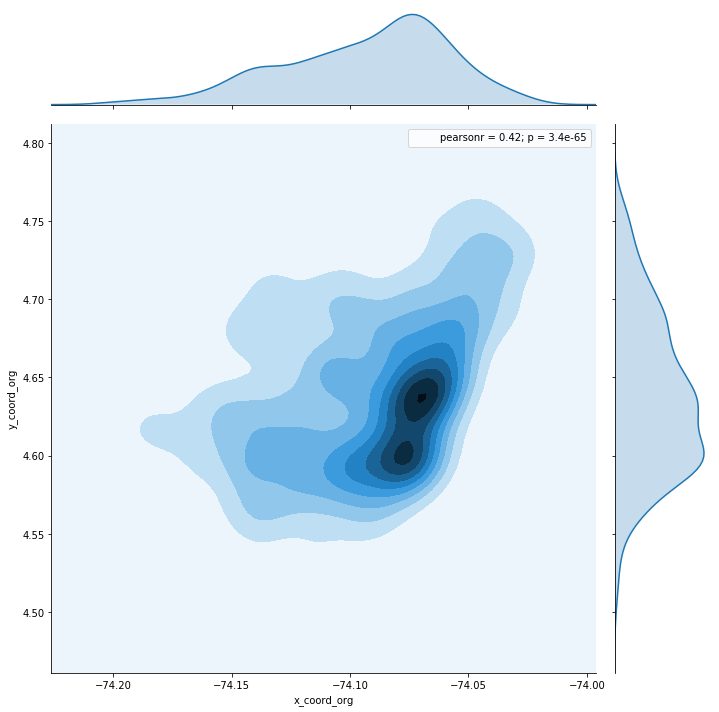

In [64]:
tm10_16 = df2.loc[(df2.hora1_inicio >= 10) & (df2.hora1_inicio < 16)]
sns.jointplot(x="x_coord_org", y="y_coord_org", data=tm10_16, kind="kde", size=10)
plt.savefig(plt.savefig('imgs/Bivariate graphs/TM_SITP_H/tm10_16.png'))

## 16-17 VALLE:

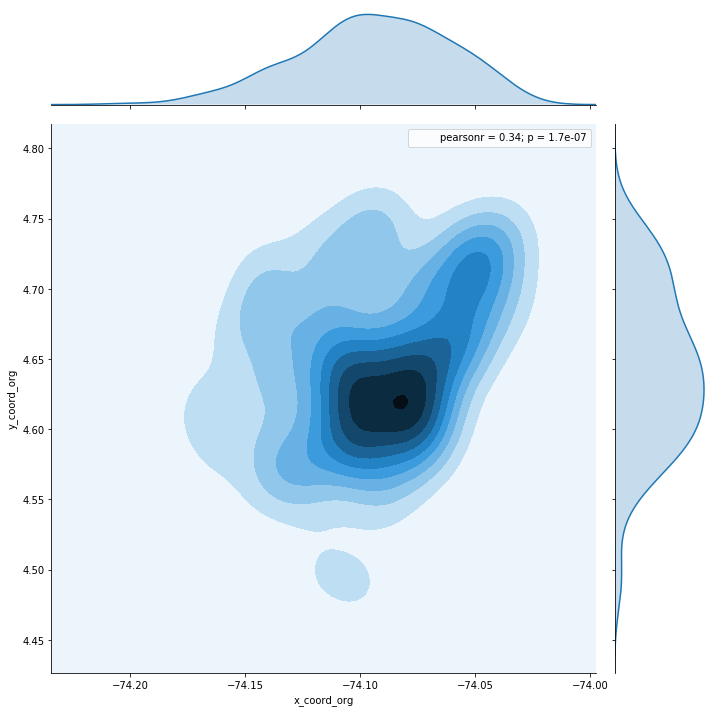

In [65]:
tm16_17 = df2.loc[(df2.hora1_inicio >= 16) & (df2.hora1_inicio < 17)]
sns.jointplot(x="x_coord_org", y="y_coord_org", data=tm16_17, kind="kde", size=10)
plt.savefig(plt.savefig('imgs/Bivariate graphs/TM_SITP_H/tm16_17.png'))

## 17-20 PICO:

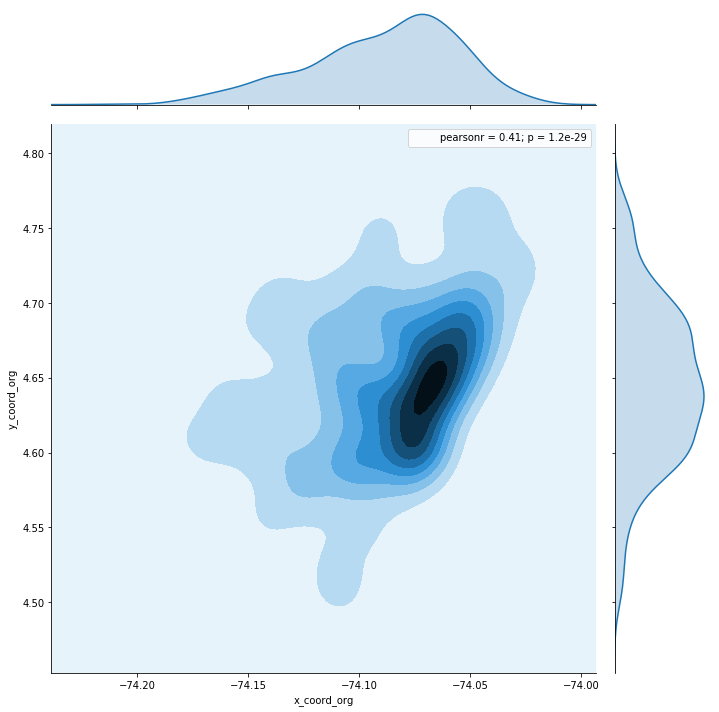

In [66]:
tm17_20 = df2.loc[(df2.hora1_inicio >= 17) & (df2.hora1_inicio < 20)]
sns.jointplot(x="x_coord_org", y="y_coord_org", data=tm17_20, kind="kde", size=10)
plt.savefig(plt.savefig('imgs/Bivariate graphs/TM_SITP_H/tm17_20.png'))

## 20-23 VALLE:

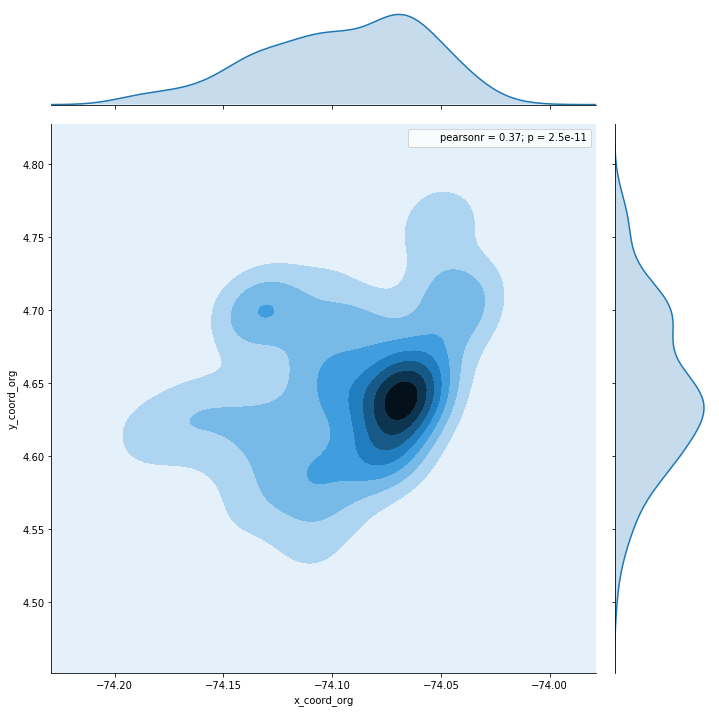

In [67]:
tm20_23 = df2.loc[(df2.hora1_inicio >= 20) & (df2.hora1_inicio < 23)]
sns.jointplot(x="x_coord_org", y="y_coord_org", data=tm20_23, kind="kde", size=10)
plt.savefig(plt.savefig('imgs/Bivariate graphs/TM_SITP_H/tm20_23.png'))

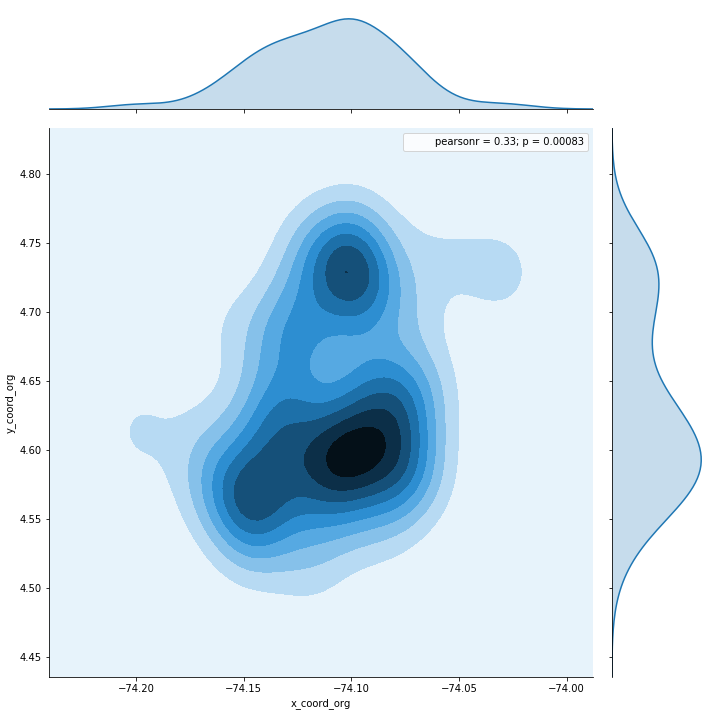

In [70]:
t1 = 400
t2 = 400
graphs = [('imgs/Bivariate graphs/TM_SITP_H/tm5_6.png', t1),
          ('imgs/Bivariate graphs/TM_SITP_H/tm6_9.png', t1),
          ('imgs/Bivariate graphs/TM_SITP_H/tm9_10.png',t1),
          ('imgs/Bivariate graphs/TM_SITP_H/tm10_16.png', t1),
          ('imgs/Bivariate graphs/TM_SITP_H/tm16_17.png', t1),
          ('imgs/Bivariate graphs/TM_SITP_H/tm17_20.png', t1),
          ('imgs/Bivariate graphs/TM_SITP_H/tm20_23.png', t1)]

anima = APNG()
for archivo, delay in graphs:
    anima.append(archivo, delay=delay)
anima.save('imgs/Bivariate graphs/TM_SITP_H/anim_TM.png')
Image(filename='imgs/Bivariate graphs/TM_SITP_H/anim_TM.png')